#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time

#  <span style="color:BLUE">CARGA DEL DATASET (3000K DE IMÁGENES)</span>



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


#  <span style="color:BLUE">NORMALIZACIÓN ESTANDAR DEL DATASET</span>

In [3]:
# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#  <span style="color:BLUE">CREACIÓN DEL MODELO</span>

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  <span style="color:BLUE">ENTRENAMIENTO DEL MODELO</span>

In [5]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 4s 10ms/step - loss: 1.7945 - accuracy: 0.3256 - val_loss: 1.4327 - val_accuracy: 0.4770
Epoch 2/10
391/391 [==============================] - 3s 9ms/step - loss: 1.3292 - accuracy: 0.5155 - val_loss: 1.1309 - val_accuracy: 0.5954
Epoch 3/10
391/391 [==============================] - 3s 9ms/step - loss: 1.1483 - accuracy: 0.5885 - val_loss: 1.0514 - val_accuracy: 0.6255
Epoch 4/10
391/391 [==============================] - 3s 9ms/step - loss: 1.0323 - accuracy: 0.6339 - val_loss: 0.9727 - val_accuracy: 0.6573
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 0.9416 - accuracy: 0.6657 - val_loss: 0.8269 - val_accuracy: 0.7116
Epoch 6/10
391/391 [==============================] - 3s 9ms/step - loss: 0.8689 - accuracy: 0.6919 - val_loss: 0.8409 - val_accuracy: 0.7083
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.8212 - accuracy: 0.7114 - val_loss: 0.7282 - val_accuracy: 0.7474
Epoch

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [6]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.7632
Test loss 0.6871, accuracy 76.32%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

Text(0, 0.5, 'acc')

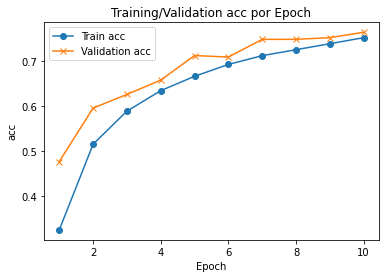

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

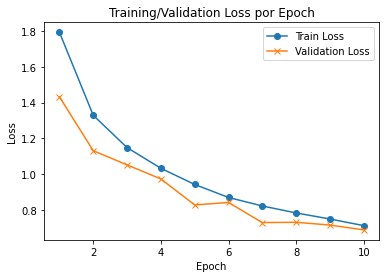

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [1]:
import pandas as pd
tabla = pd.DataFrame(columns=('CNN','MIN-MAX', 'MEAN','255'))
tabla.loc[len(tabla)]=['LeNet-5',70.51,51.32, 42.50] 
tabla.loc[len(tabla)]=['Estándar',111.40,54.12,41.99] 
tabla
tabla.head()

,CNN,MIN-MAX,MEAN,255
0,LeNet-5,70.51,51.32,42.50
1,Estándar,111.40,54.12,41.99


In [11]:
import pandas as pd
tabla = pd.DataFrame(columns=('CNN','MIN-MAX', 'MEAN','255'))
tabla.loc[len(tabla)]=['LeNet-5','50.05%','56.69%','50.11%' ] 
tabla.loc[len(tabla)]=['Estándar','75.54%','75.86%','75.01%'] 
tabla
tabla.head()

,CNN,MIN-MAX,MEAN,255
0,LeNet-5,50.05%,56.69%,50.11%
1,Estándar,75.54%,75.86%,75.01%
